In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json

In [2]:
data = pd.read_excel('height_and_pose.xlsx')
index = 4

In [3]:
data.shape

(9, 3)

In [4]:
data

,Depthmap Image,Height(cm),Pose
0,1d5fee00-ada4-11eb-a80b-3f50af21830f,76.7,"[{'bbox_coordinates': [(158.91087, 92.53168), ..."
1,1eddf4c0-ad9f-11eb-a80b-ef4adba049aa,66.4,"[{'bbox_coordinates': [(131.00702, 68.115364),..."
2,38e29bc0-8fc0-11eb-b5f2-0742da91b282,63.2,"[{'bbox_coordinates': [(116.070114, 37.567608)..."
3,6cd5d480-8b8b-11eb-b152-f7b115384fa9,87.1,"[{'bbox_coordinates': [(145.24242, 26.49348), ..."
4,76ed6fc0-8e1d-11eb-ad70-7be1a1219834,59.1,"[{'bbox_coordinates': [(150.17046, 65.00379), ..."
5,8d23fa60-9201-11eb-b3e6-cbfb48c6a300,86.4,"[{'bbox_coordinates': [(146.97789, 37.342777),..."
6,9dc3eba0-8d8d-11eb-8d3f-4776be867c61,100.6,"[{'bbox_coordinates': [(135.09724, 42.205784),..."
7,9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4,106.1,"[{'bbox_coordinates': [(167.52087, 52.946323),..."
8,d3757800-8dff-11eb-a328-472d4f8db277,99.9,"[{'bbox_coordinates': [(92.025406, 19.148962),..."


In [5]:
data['Pose'][index]

"[{'bbox_coordinates': [(150.17046, 65.00379), (373.36887, 611.4233)], 'bbox_confidence_score': [0.9969072], 'key_points_coordinate': [{'nose': {'x': 167.49805, 'y': 155.00647}}, {'left_eye': {'x': 171.05548, 'y': 151.44904}}, {'right_eye': {'x': 174.61288, 'y': 151.44904}}, {'left_ear': {'x': 213.7445, 'y': 169.23615}}, {'right_ear': {'x': 295.56512, 'y': 147.89163}}, {'left_shoulder': {'x': 195.9574, 'y': 219.04001}}, {'right_shoulder': {'x': 309.7948, 'y': 176.35098}}, {'left_elbow': {'x': 160.38321, 'y': 194.13806}}, {'right_elbow': {'x': 348.92642, 'y': 140.7768}}, {'left_wrist': {'x': 167.49805, 'y': 147.89163}}, {'right_wrist': {'x': 331.1393, 'y': 98.08776}}, {'left_hip': {'x': 235.08902, 'y': 361.33676}}, {'right_hip': {'x': 309.7948, 'y': 350.6645}}, {'left_knee': {'x': 203.07224, 'y': 443.15738}}, {'right_knee': {'x': 324.02448, 'y': 450.27222}}, {'left_ankle': {'x': 224.41675, 'y': 539.2077}}, {'right_ankle': {'x': 309.7948, 'y': 546.3225}}], 'key_points_prob': [{'nose': {'

In [6]:
data['Depthmap Image'][index]

'76ed6fc0-8e1d-11eb-ad70-7be1a1219834'

In [7]:
ls depthmap/

1d5fee00-ada4-11eb-a80b-3f50af21830f.jpg
1eddf4c0-ad9f-11eb-a80b-ef4adba049aa.jpg
38e29bc0-8fc0-11eb-b5f2-0742da91b282.jpg
6cd5d480-8b8b-11eb-b152-f7b115384fa9.jpg
76ed6fc0-8e1d-11eb-ad70-7be1a1219834.jpg
8d23fa60-9201-11eb-b3e6-cbfb48c6a300.jpg
9dc3eba0-8d8d-11eb-8d3f-4776be867c61.jpg
9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4.jpg
d3757800-8dff-11eb-a328-472d4f8db277.jpg


In [8]:
img = cv2.imread('depthmap/' + data['Depthmap Image'][index] + '.jpg')

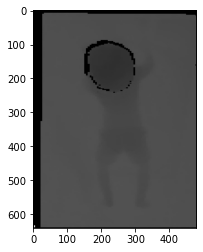

In [9]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [10]:
image.shape # h w c

(640, 480, 3)

In [11]:
keypoints = eval(data['Pose'][index])[0]

In [12]:
keypoints['bbox_coordinates'][0][0]

150.17046

In [13]:
nose_x = int(keypoints['key_points_coordinate'][0]['nose']['x'])
nose_y = int(keypoints['key_points_coordinate'][0]['nose']['y'])

In [14]:
x1, y1 = int(keypoints['bbox_coordinates'][0][0]), int(keypoints['bbox_coordinates'][0][1])
x2, y2 = int(keypoints['bbox_coordinates'][1][0]), int(keypoints['bbox_coordinates'][1][1])
img = cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)

In [15]:
keypoints['key_points_coordinate']

[{'nose': {'x': 167.49805, 'y': 155.00647}},
 {'left_eye': {'x': 171.05548, 'y': 151.44904}},
 {'right_eye': {'x': 174.61288, 'y': 151.44904}},
 {'left_ear': {'x': 213.7445, 'y': 169.23615}},
 {'right_ear': {'x': 295.56512, 'y': 147.89163}},
 {'left_shoulder': {'x': 195.9574, 'y': 219.04001}},
 {'right_shoulder': {'x': 309.7948, 'y': 176.35098}},
 {'left_elbow': {'x': 160.38321, 'y': 194.13806}},
 {'right_elbow': {'x': 348.92642, 'y': 140.7768}},
 {'left_wrist': {'x': 167.49805, 'y': 147.89163}},
 {'right_wrist': {'x': 331.1393, 'y': 98.08776}},
 {'left_hip': {'x': 235.08902, 'y': 361.33676}},
 {'right_hip': {'x': 309.7948, 'y': 350.6645}},
 {'left_knee': {'x': 203.07224, 'y': 443.15738}},
 {'right_knee': {'x': 324.02448, 'y': 450.27222}},
 {'left_ankle': {'x': 224.41675, 'y': 539.2077}},
 {'right_ankle': {'x': 309.7948, 'y': 546.3225}}]

In [16]:
for key_point in keypoints['key_points_coordinate']:

    if 'ankle' in list(key_point.keys())[0]:
        print(list(key_point.keys())[0])
        x = int(list(key_point.values())[0]['x'])
        y = int(list(key_point.values())[0]['y'])
    
        img = cv2.circle(img, (x, y), 10, (0,0,255), 2)

left_ankle
right_ankle


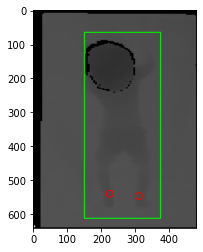

In [17]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Approach 1 (Bruteforce)

Mostly the boxheight and actual height ratio is ~6. We can multipy the boxheight to 6 

In [18]:
# ratio of boxheight wrt kid height

for index, row in data.iterrows():
    kid_height = row['Height(cm)']
    boxheight = eval(row['Pose'])[0]['bbox_coordinates'][1][1] - eval(row['Pose'])[0]['bbox_coordinates'][0][1]
    print("ratio: ", boxheight/kid_height)

ratio:  6.835533507170794
ratio:  7.398860481927711
ratio:  7.98164496835443
ratio:  7.011953157290471
ratio:  9.245676988155669
ratio:  6.699851655092593
ratio:  5.638930576540756
ratio:  5.005006757775683
ratio:  6.065126506506506


In [19]:
row['Height(cm)']

99.9

# Approach 2 (Machine Learning)
We can create structured data from the keypoints and train models like XGboost or decesion tree

In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
data

,Depthmap Image,Height(cm),Pose
0,1d5fee00-ada4-11eb-a80b-3f50af21830f,76.7,"[{'bbox_coordinates': [(158.91087, 92.53168), ..."
1,1eddf4c0-ad9f-11eb-a80b-ef4adba049aa,66.4,"[{'bbox_coordinates': [(131.00702, 68.115364),..."
2,38e29bc0-8fc0-11eb-b5f2-0742da91b282,63.2,"[{'bbox_coordinates': [(116.070114, 37.567608)..."
3,6cd5d480-8b8b-11eb-b152-f7b115384fa9,87.1,"[{'bbox_coordinates': [(145.24242, 26.49348), ..."
4,76ed6fc0-8e1d-11eb-ad70-7be1a1219834,59.1,"[{'bbox_coordinates': [(150.17046, 65.00379), ..."
5,8d23fa60-9201-11eb-b3e6-cbfb48c6a300,86.4,"[{'bbox_coordinates': [(146.97789, 37.342777),..."
6,9dc3eba0-8d8d-11eb-8d3f-4776be867c61,100.6,"[{'bbox_coordinates': [(135.09724, 42.205784),..."
7,9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4,106.1,"[{'bbox_coordinates': [(167.52087, 52.946323),..."
8,d3757800-8dff-11eb-a328-472d4f8db277,99.9,"[{'bbox_coordinates': [(92.025406, 19.148962),..."


In [22]:
data_list = []

for index, row in data.iterrows():
    data_dict = {}
    
    data_dict['FileName'] = row['Depthmap Image']
    data_dict['Height'] = row['Height(cm)']
    
    pose_dict = eval(row['Pose'])[0]
    
    data_dict['BboxX1'] = pose_dict['bbox_coordinates'][0][0]
    data_dict['BboxY1'] = pose_dict['bbox_coordinates'][0][1]
    data_dict['BboxX2'] = pose_dict['bbox_coordinates'][1][0]
    data_dict['BboxY2'] = pose_dict['bbox_coordinates'][1][1]
    
    for key_point_dict in pose_dict['key_points_coordinate']:
        key_point_name = list(key_point_dict.keys())[0]
        
        data_dict[key_point_name + 'X'] = key_point_dict[key_point_name]['x']
        data_dict[key_point_name + 'Y'] = key_point_dict[key_point_name]['y']
    
    data_list.append(data_dict)

In [23]:
data_expanded = pd.DataFrame.from_dict(data_list)

In [24]:
data_expanded.head()

,FileName,Height,BboxX1,BboxY1,BboxX2,BboxY2,noseX,noseY,left_eyeX,left_eyeY,...,right_hipX,right_hipY,left_kneeX,left_kneeY,right_kneeX,right_kneeY,left_ankleX,left_ankleY,right_ankleX,right_ankleY
0,1d5fee00-ada4-11eb-a80b-3f50af21830f,76.7,158.910870,92.531680,396.85934,616.81710,265.93850,182.30190,289.83170,168.648620,...,269.35180,404.16748,354.68472,506.56696,231.80533,486.08707,313.72490,489.50037,214.73874,547.52673
1,1eddf4c0-ad9f-11eb-a80b-ef4adba049aa,66.4,131.007020,68.115364,420.18910,559.39970,305.98350,200.21199,197.23564,152.235000,...,305.98350,350.53990,235.61723,427.30307,344.36508,398.51688,267.60190,494.47086,360.35740,472.08160
2,38e29bc0-8fc0-11eb-b5f2-0742da91b282,63.2,116.070114,37.567608,395.04500,542.00757,191.51735,123.93983,201.36969,123.939830,...,293.32490,357.11194,224.35849,432.64658,319.59780,416.22598,250.63140,508.18118,306.46133,488.47650
3,6cd5d480-8b8b-11eb-b152-f7b115384fa9,87.1,145.242420,26.493480,346.44390,637.23460,239.87890,142.99553,263.73596,127.090805,...,208.06947,369.63776,259.75980,476.99460,196.14093,469.04224,243.85509,560.49440,188.18857,556.51820
4,76ed6fc0-8e1d-11eb-ad70-7be1a1219834,59.1,150.170460,65.003790,373.36887,611.42330,167.49805,155.00647,171.05548,151.449040,...,309.79480,350.66450,203.07224,443.15738,324.02448,450.27222,224.41675,539.20770,309.79480,546.32250


In [25]:
data_expanded.describe()

,Height,BboxX1,BboxY1,BboxX2,BboxY2,noseX,noseY,left_eyeX,left_eyeY,right_eyeX,...,right_hipX,right_hipY,left_kneeX,left_kneeY,right_kneeX,right_kneeY,left_ankleX,left_ankleY,right_ankleX,right_ankleY
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,82.833333,138.113588,49.039530,353.494562,600.178563,238.426009,154.943097,236.281840,139.024660,243.247609,...,253.281238,365.438247,240.677191,460.569497,257.735939,454.352038,238.147319,533.921108,257.481167,537.650793
std,17.448496,23.026388,23.028419,44.432126,31.717687,47.275394,24.652425,43.155424,16.208864,47.892377,...,44.354268,17.289083,52.300546,26.060133,57.738653,30.373213,46.807325,36.087972,58.335031,39.233026
min,59.100000,92.025406,19.148962,295.216250,542.007570,167.498050,123.939830,171.055480,118.949905,174.612880,...,190.359480,349.849800,164.035550,427.303070,190.359480,398.516880,140.367360,489.500370,188.188570,472.081600
25%,66.400000,131.007020,37.342777,322.878800,583.977540,212.518720,142.995530,201.369690,127.090805,208.898880,...,215.813350,350.664500,218.051710,443.157380,222.727830,450.272220,224.416750,508.181180,214.738740,524.167360
50%,86.400000,145.242420,42.205784,346.443900,611.423300,235.040180,155.006470,235.040180,136.957100,242.929580,...,255.738370,361.677340,235.617230,451.565430,231.805330,455.022670,243.855090,524.167360,250.818980,546.322500
75%,99.900000,150.170460,65.003790,395.045000,616.817100,265.938500,161.496290,263.735960,151.449040,293.425050,...,293.324900,371.410800,259.759800,477.917720,319.597800,470.028320,253.842930,560.494400,306.461330,556.518200
max,106.100000,167.520870,92.531680,420.189100,637.234600,305.983500,200.211990,300.962370,168.648620,305.983500,...,309.794800,404.167480,354.684720,506.566960,344.365080,490.713380,313.724900,588.369400,360.357400,592.467350


In [26]:
# split data into X and y
X = data_expanded.iloc[:, 2:]
Y = data_expanded.iloc[:,1]

In [27]:
X.head()

,BboxX1,BboxY1,BboxX2,BboxY2,noseX,noseY,left_eyeX,left_eyeY,right_eyeX,right_eyeY,...,right_hipX,right_hipY,left_kneeX,left_kneeY,right_kneeX,right_kneeY,left_ankleX,left_ankleY,right_ankleX,right_ankleY
0,158.910870,92.531680,396.85934,616.81710,265.93850,182.30190,289.83170,168.648620,245.45859,165.235300,...,269.35180,404.16748,354.68472,506.56696,231.80533,486.08707,313.72490,489.50037,214.73874,547.52673
1,131.007020,68.115364,420.18910,559.39970,305.98350,200.21199,197.23564,152.235000,305.98350,181.021200,...,305.98350,350.53990,235.61723,427.30307,344.36508,398.51688,267.60190,494.47086,360.35740,472.08160
2,116.070114,37.567608,395.04500,542.00757,191.51735,123.93983,201.36969,123.939830,299.89313,137.076300,...,293.32490,357.11194,224.35849,432.64658,319.59780,416.22598,250.63140,508.18118,306.46133,488.47650
3,145.242420,26.493480,346.44390,637.23460,239.87890,142.99553,263.73596,127.090805,223.97418,127.090805,...,208.06947,369.63776,259.75980,476.99460,196.14093,469.04224,243.85509,560.49440,188.18857,556.51820
4,150.170460,65.003790,373.36887,611.42330,167.49805,155.00647,171.05548,151.449040,174.61288,151.449040,...,309.79480,350.66450,203.07224,443.15738,324.02448,450.27222,224.41675,539.20770,309.79480,546.32250


In [28]:
Y.head()

0    76.7
1    66.4
2    63.2
3    87.1
4    59.1
Name: Height, dtype: float64

In [29]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [30]:
y_train

8     99.9
5     86.4
3     87.1
6    100.6
1     66.4
4     59.1
Name: Height, dtype: float64

In [31]:
X_train

,BboxX1,BboxY1,BboxX2,BboxY2,noseX,noseY,left_eyeX,left_eyeY,right_eyeX,right_eyeY,...,right_hipX,right_hipY,left_kneeX,left_kneeY,right_kneeX,right_kneeY,left_ankleX,left_ankleY,right_ankleX,right_ankleY
8,92.025406,19.148962,295.21625,625.05510,235.04018,126.83931,235.04018,118.949905,242.92958,111.060500,...,231.09547,371.41080,164.03555,477.91772,231.09547,470.02832,140.36736,588.36940,250.81898,580.48000
5,146.977890,37.342777,323.04355,616.20996,304.73105,143.99603,300.96237,128.921370,293.42505,128.921370,...,255.73837,373.88470,218.05171,479.40735,259.50705,490.71338,210.51437,581.16140,263.27570,592.46735
3,145.242420,26.493480,346.44390,637.23460,239.87890,142.99553,263.73596,127.090805,223.97418,127.090805,...,208.06947,369.63776,259.75980,476.99460,196.14093,469.04224,243.85509,560.49440,188.18857,556.51820
6,135.097240,42.205784,308.40625,609.48220,212.51872,161.49629,227.29155,143.030270,194.05269,143.030270,...,190.35948,349.84980,245.75758,449.56638,190.35948,453.25958,238.37117,519.73730,194.05269,530.81690
1,131.007020,68.115364,420.18910,559.39970,305.98350,200.21199,197.23564,152.235000,305.98350,181.021200,...,305.98350,350.53990,235.61723,427.30307,344.36508,398.51688,267.60190,494.47086,360.35740,472.08160
4,150.170460,65.003790,373.36887,611.42330,167.49805,155.00647,171.05548,151.449040,174.61288,151.449040,...,309.79480,350.66450,203.07224,443.15738,324.02448,450.27222,224.41675,539.20770,309.79480,546.32250


In [34]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [35]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [37]:
predictions

[86, 77, 57]

In [42]:
list(y_test)

[63.2, 106.1, 76.7]

In [46]:
# evaluate predictions
r2 = r2_score(list(y_test), predictions)
print("r2: %.2f%%" % (r2))

r2: -0.82%
